In [1]:
import numpy as np
import pandas as pd
import ccxt
import time
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
exchange = ccxt.binance()

In [3]:
def fetch_orderbook_snapshot(ticker='BTC/USDT:USDT'):
    orderbook = exchange.fetch_order_book(ticker)
    timestamp = exchange.milliseconds()
    bids = pd.DataFrame(orderbook['bids'], columns=['price', 'size'])
    asks = pd.DataFrame(orderbook['asks'], columns=['price', 'size'])
    return timestamp, bids, asks

data = []
num_snapshots = 2000

for _ in range(num_snapshots):
    timestamp, bids, asks = fetch_orderbook_snapshot()
    data.append((timestamp, bids, asks))
    time_interval = random.randint(100, 200) / 100
    time.sleep(time_interval)

order_book_data = pd.DataFrame(data, columns=['timestamp', 'bids', 'asks'])

In [4]:
order_book_data

,timestamp,bids,asks
0,1728111405985,price size 0 62202.8 7.054 1 6...,price size 0 62202.9 20.841 1 ...
1,1728111408037,price size 0 62202.8 7.595 1 6...,price size 0 62202.9 16.393 1 ...
2,1728111409142,price size 0 62202.8 7.542 1 6...,price size 0 62202.9 15.942 1 ...
3,1728111410723,price size 0 62202.8 7.071 1 6...,price size 0 62202.9 15.930 1 ...
4,1728111412659,price size 0 62202.8 6.967 1 6...,price size 0 62202.9 14.042 1 ...
...,...,...,...
1995,1728114615698,price size 0 62062.0 9.066 1 ...,price size 0 62062.1 1.193 1 6...
1996,1728114617026,price size 0 62062.1 21.627 1 ...,price size 0 62062.2 1.924 1 6...
1997,1728114618539,price size 0 62062.1 17.601 1 ...,price size 0 62062.2 2.745 1 6...
1998,1728114619947,price size 0 62062.1 19.621 1 ...,price size 0 62062.2 2.614 1 6...


In [5]:
def process_order_book(order_book_data):
    price_levels = np.array([])
    
    for _, bids, asks in order_book_data.values:
        price_levels = np.append(price_levels, bids['price'].values)
        price_levels = np.append(price_levels, asks['price'].values)

    price_levels = np.unique(price_levels)
    price_levels.sort()

    price_matrix = np.zeros((len(price_levels), len(order_book_data)))

    for idx, (_, bids, asks) in enumerate(order_book_data.values):
        for _, row in bids.iterrows():
            price_index = np.where(price_levels == row['price'])[0]
            if (len(price_index) > 0):
                price_matrix[price_index[0], idx] = row['size']

        for _, row in asks.iterrows():
            price_index = np.where(price_levels == row['price'])[0]
            if (len(price_index) > 0):
                price_matrix[price_index[0], idx] = -row['size']

    return price_levels, price_matrix

In [6]:
price_levels, price_matrix = process_order_book(order_book_data)

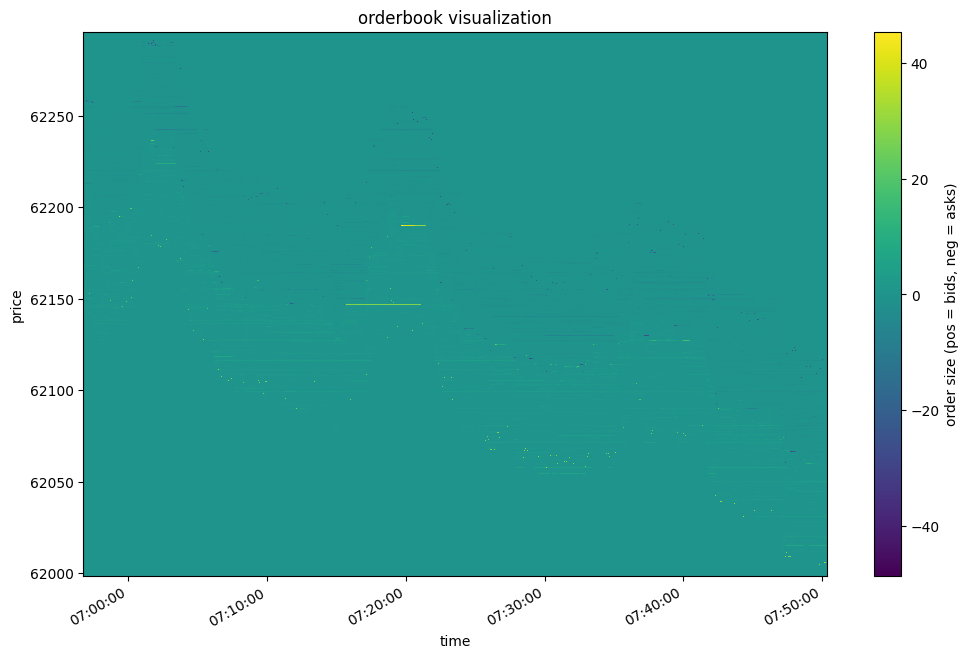

In [9]:
time_labels = pd.to_datetime(order_book_data['timestamp'], unit='ms')

plt.figure(figsize=(12, 8))

plt.pcolormesh(time_labels, price_levels, price_matrix, cmap='viridis', shading='auto')

plt.title('orderbook visualization')
plt.xlabel('time')
plt.ylabel('price')
plt.colorbar(label='order size (pos = bids, neg = asks)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.show()